In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Jackline Oduor/Desktop/MyPythonprojects/Customer Segmentation/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

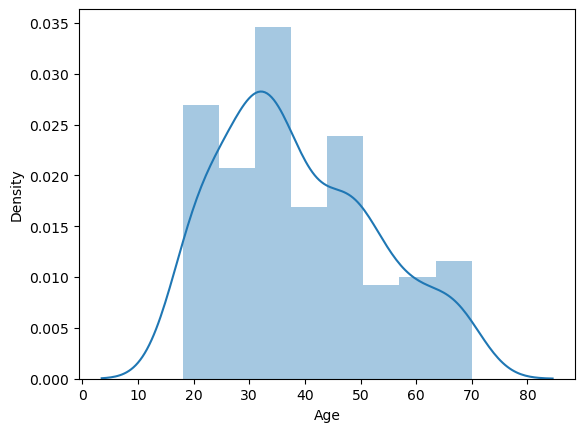

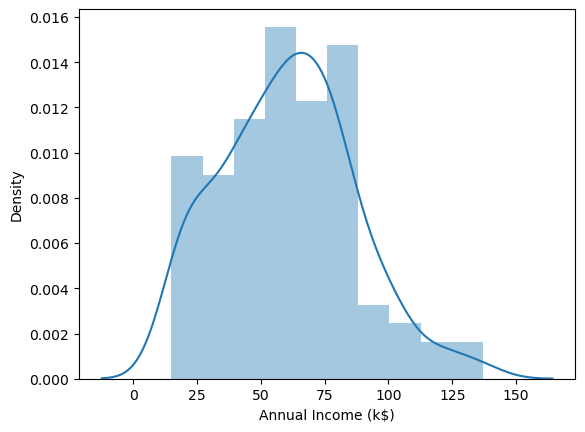

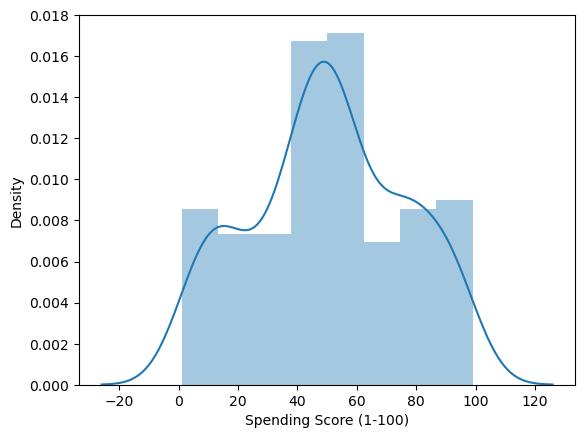

In [5]:
#Create histograms for numerical columns
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i]);


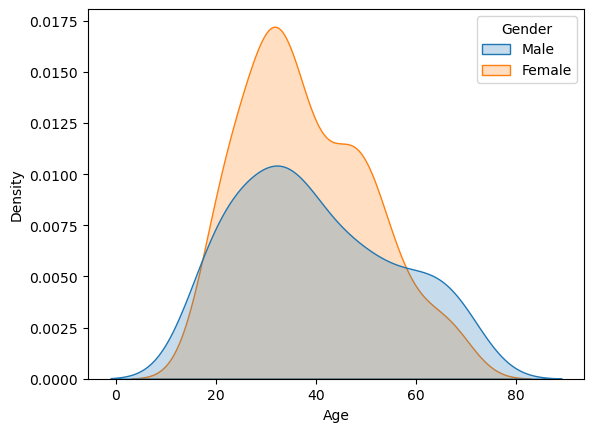

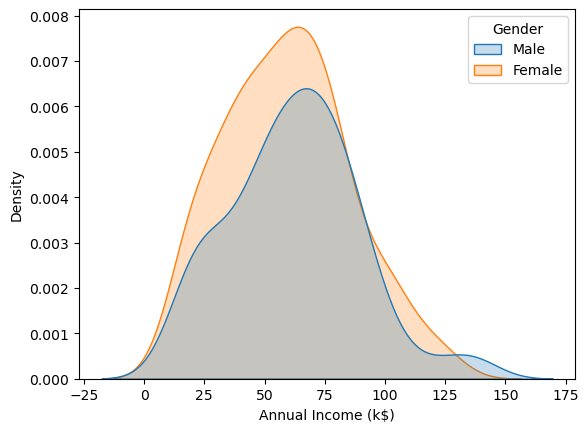

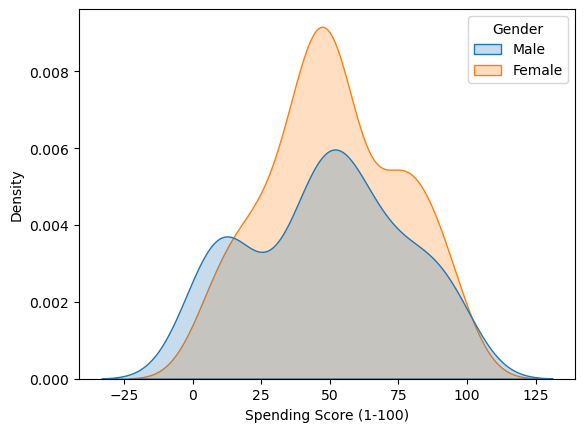

In [6]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df,x=i, shade=True, hue=df['Gender'])


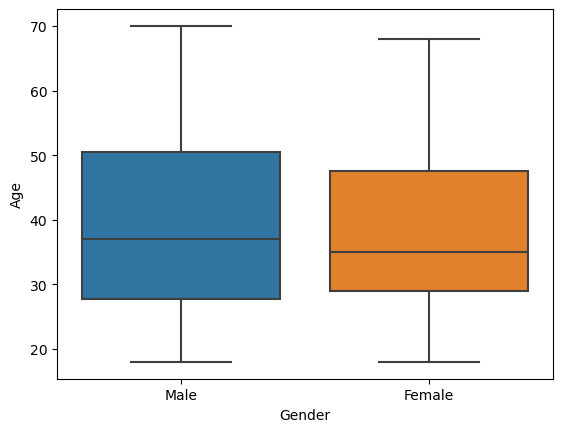

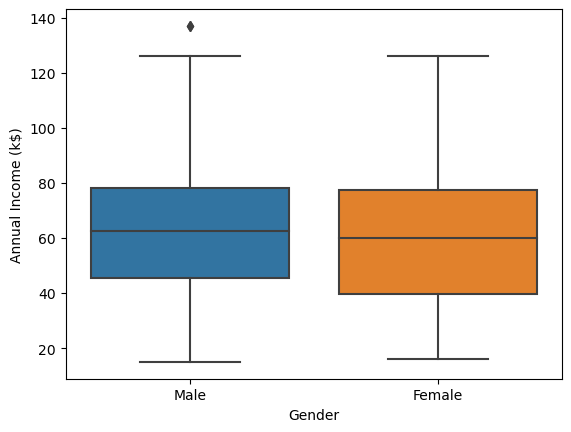

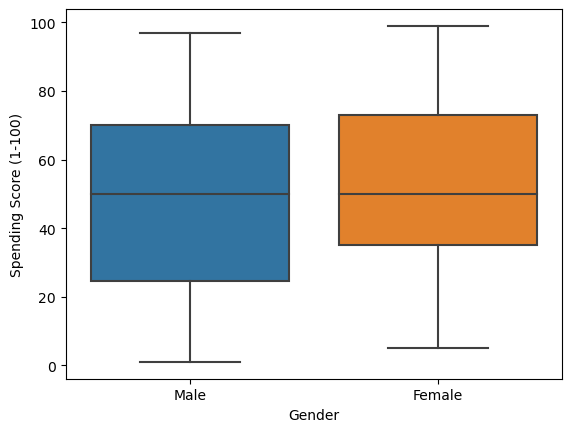

In [7]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender', y=df[i])

In [8]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

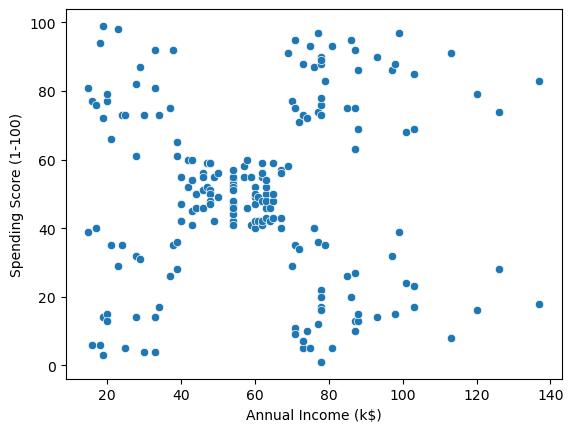

In [9]:
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)')

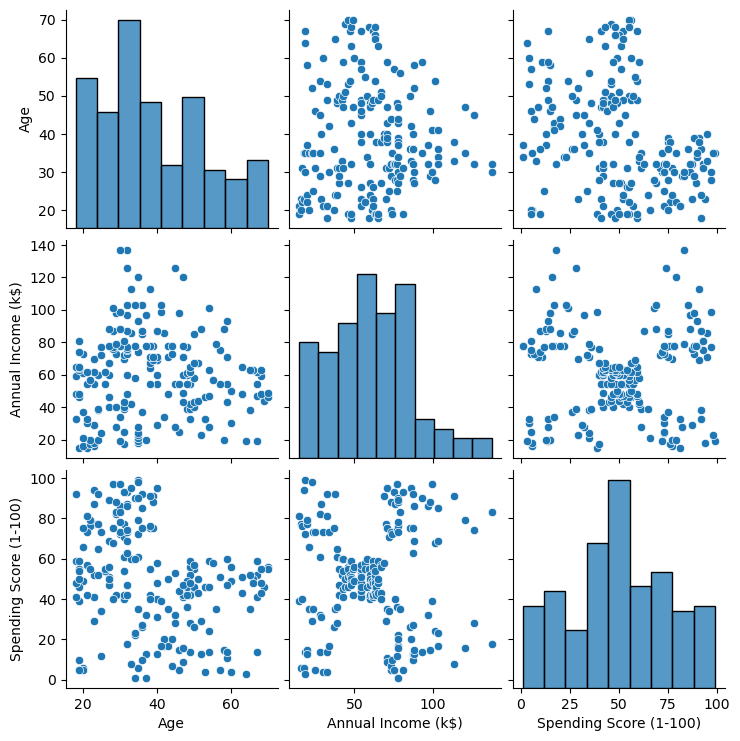

In [10]:
df = df.drop(columns='CustomerID')
sns.pairplot(df)

In [11]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [12]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

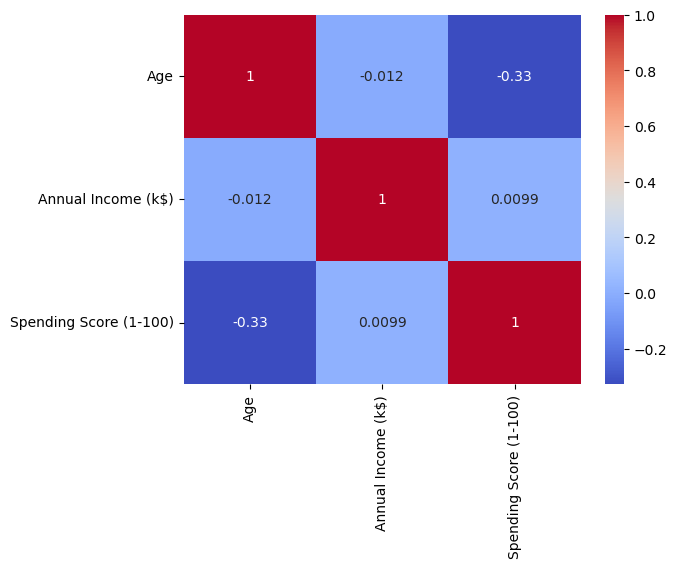

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Clustering

In [14]:
clustering1 = KMeans(n_clusters=3)

In [15]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [16]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [17]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [18]:
df['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [19]:
clustering1.inertia_

23517.330930930937

In [20]:
inertia_scores=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [21]:
inertia_scores

[137277.28,
 48660.88888888889,
 23528.152173913044,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3941.4163614163617,
 2862.833028083028,
 2208.812049062049,
 1766.973953823954]

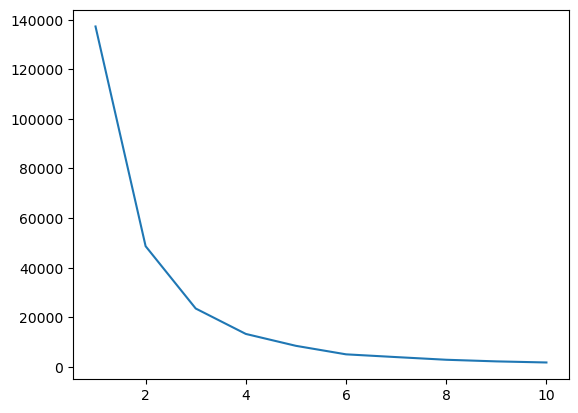

In [22]:
plt.plot(range(1,11), inertia_scores)

In [23]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [24]:
df.groupby(['Income Cluster'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


# Bivariate Analysis

In [25]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Income and Spending Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,3
2,Female,20,16,6,1,0
3,Female,23,16,77,1,3
4,Female,31,17,40,1,0


In [26]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

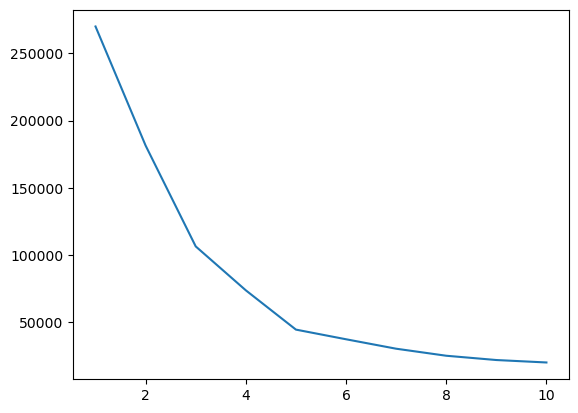

In [27]:
plt.plot(range(1,11), inertia_scores2)

In [28]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Income and Spending Cluster'],
      dtype='object')

In [29]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

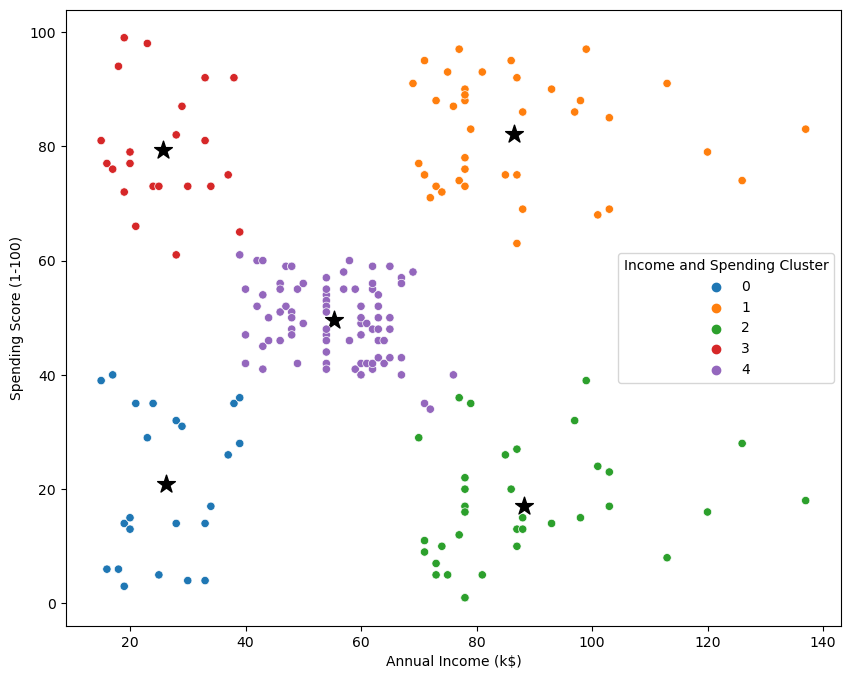

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=180, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income and Spending Cluster', palette='tab10')

In [31]:
pd.crosstab(df['Income and Spending Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Income and Spending Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.592593,0.407407


In [32]:
df.groupby(['Income and Spending Cluster'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and Spending Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,42.716049,55.296296,49.518519


# Multivariate Analysis

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [34]:
df1 = pd.get_dummies(df, drop_first=True)
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster,Gender_Male
0,19,15,39,1,0,1
1,21,15,81,1,3,1
2,20,16,6,1,0,0
3,23,16,77,1,3,0
4,31,17,40,1,0,0


In [35]:
df1.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Income and Spending Cluster', 'Gender_Male'],
      dtype='object')

In [36]:
df2 = df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [37]:
df2 = pd.DataFrame(scale.fit_transform(df2))

In [38]:
df2.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [39]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(df2)
    inertia_scores3.append(kmeans3.inertia_)

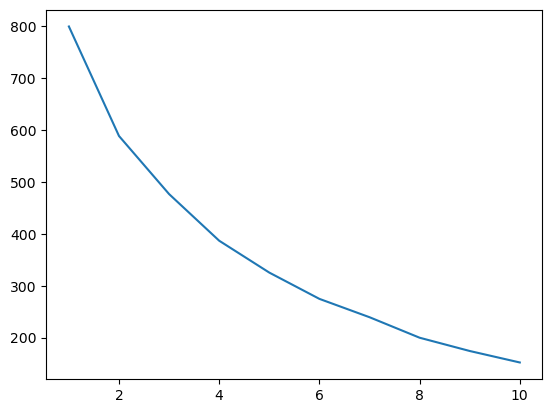

In [44]:
plt.plot(range(1,11), inertia_scores3)

In [41]:
clustering3 = KMeans(n_clusters=4)
clustering3.fit(df1)
df['Income,Spending Cluster and Gender'] = clustering3.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Cluster,"Income,Spending Cluster and Gender"
0,Male,19,15,39,1,0,2
1,Male,21,15,81,1,3,2
2,Female,20,16,6,1,0,3
3,Female,23,16,77,1,3,2
4,Female,31,17,40,1,0,3


In [46]:
#centers1 = pd.DataFrame(clustering3.cluster_centers_)
#centers1.columns = ['x', 'y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

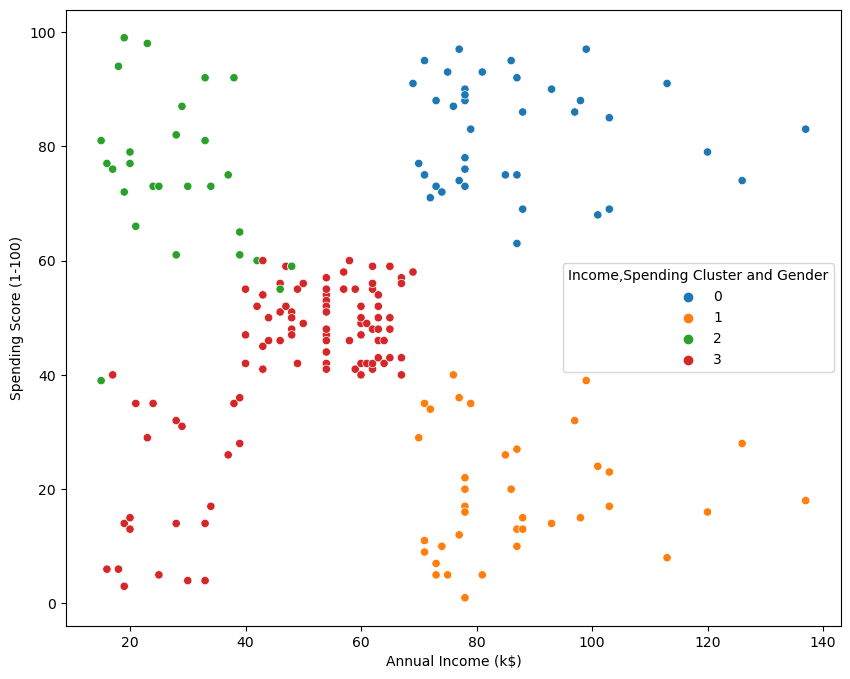

In [47]:
plt.figure(figsize=(10,8))
#plt.scatter(x=centers1['x'], y=centers1['y'], s=180, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income,Spending Cluster and Gender', palette='tab10')